In [649]:
import odrive.core
import time
import math

from IPython.lib.display import YouTubeVideo # for youtube videos

my_drive = odrive.core.find_any(consider_usb=True, consider_serial=False, printer=print)

# define handles to the motor functions
m0=my_drive.motor0
m1=my_drive.motor1

looking for ODrive...
Found ODrive via PyUSB
ConfigurationValue 1
	InterfaceNumber 0,0
		EndpointAddress 130
	InterfaceNumber 1,1
		EndpointAddress 1
		EndpointAddress 129

EndpointAddress for writing 1

EndpointAddress for reading 129

Connecting to device on USB device bus 0 device 11
JSON: [{"name":"","id":0,"type":"json","access":"rw"},{"name":"vbus_voltage","id":1,"type":"float","access":"r"},{"name":"serial_number","id":2,"type":"uint64","access":"r"},{"name":"run_anticogging_calibration","id":3,"type":"function","arguments":[]},{"name":"config","id":5,"type":"object","members":[{"name":"brake_resistance","id":6,"type":"float","access":"rw"}]},{"name":"axis0","id":8,"type":"object","members":[{"name":"config","id":9,"type":"object","members":[{"name":"enable_control_at_start","id":10,"type":"bool","access":"rw"},{"name":"do_calibration_at_start","id":11,"type":"bool","access":"rw"}]}]},{"name":"motor0","id":14,"type":"object","members":[{"name":"config","id":15,"type":"object","m

In [476]:
def get_encoder_state():
    
    motor0_position = m0.encoder.pll_pos
    motor1_position = m1.encoder.pll_pos
    motor0_velocity = m0.encoder.pll_vel
    motor1_velocity = m1.encoder.pll_vel
    
    return (motor0_position, motor0_velocity, motor1_position, motor1_velocity)


In [10]:
#OLD
#To define legs apart poistion
state = get_encoder_state()
print(state)


(-1070.2305908203125, 0.0135345458984375, 1088.2362060546875, -0.0279693603515625)


In [11]:
#OLD
#To define legs extended position
state = get_encoder_state()
print(state)

(793.2299194335938, 0.0135345458984375, -696.2354736328125, -0.0279693603515625)


In [19]:
#NEW
#To define legs apart poistion
fake_ap = get_encoder_state()
print(fake_ap)

(-694.7660522460938, 0.0001068115234375, 583.2374267578125, 0.0008392333984375)


In [20]:
#FNEW
#To define legs extended position
fake_ex = get_encoder_state()
print(fake_ex)

(1045.242431640625, 0.0001373291015625, -1122.232666015625, 0.0008392333984375)


In [629]:
def jump():
    m0.set_pos_setpoint(fake_ex[0], 1, 0)
    m1.set_pos_setpoint(fake_ex[2], 1, 0)

In [630]:
def squat():
    m0.set_pos_setpoint(fake_ap[0], 0, 0)
    m1.set_pos_setpoint(fake_ap[2], 0, 0)

In [569]:
initial_time = time.monotonic()
t0 = initial_time
vm1 = []
vm0 = []
current_time = time.monotonic()
while (current_time - t0) < 1:
    current_time = time.monotonic()
    read_val = get_encoder_state()
    vm0.append(read_val[0])
    vm1.append(read_val[2])
    time.sleep(0.4) 

In [570]:
print(vm0)
print(vm1)


[1048.0421142578125, 1048.4053955078125, 1048.000732421875, 1048.3624267578125]
[-1120.48095703125, -1120.4539794921875, -1120.427490234375, -1120.3978271484375]


In [647]:
squat()

In [648]:
jump()

In [457]:
haf_squat()

In [605]:
initial_time = time.monotonic()
t0 = initial_time
current_time = time.monotonic()
k=0

while (current_time - t0) < 10:
    
    read1 = get_encoder_state()
    time.sleep(0.05)
    read2 = get_encoder_state()
    if (round(read2[0],-2) == -700): #Detect stance
        if round(read2[1] - read1[1],-2)<-50 or (round(read2[1] - read1[1],1)==0): #Detect start of lift-off or starting from squatting position
            jump()
            
           

       
    if (round(read2[0],-2) == 900) or (round(read2[0],-2) == 1000): #Detect stance
        if (round(read2[1] - read1[1],-2)>50) or (round(read2[1] - read1[1],1)==0): #Detect ground collision or starting from extended position
            squat()
            time.sleep(0.15)
               
    current_time = time.monotonic()    
       
    
        
    
    

In [583]:
print(read1)
print(read2)

(-633.4647216796875, -3033.698974609375, 503.0157165527344, 3521.070556640625)
(-750.7586669921875, -0.3661041259765625, 623.7738647460938, 2.4046783447265625)


In [627]:
m0.set_pos_setpoint(10000, 1, )
time.sleep(1)
m0.set_pos_setpoint(fake_ex[0], 1, 0)

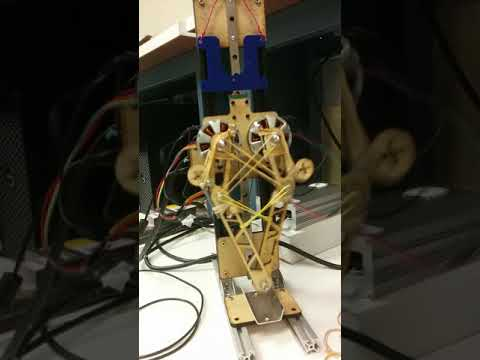

In [650]:
YouTubeVideo('n6dt6vxgVog')